In [1]:
# !dir

In [2]:
import os,shutil,pathlib

In [3]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

In [4]:
# def make_subset(subset_name, start_index, end_index):
#     for category in ("cat", "dog"):
#         dir = new_base_dir / subset_name / category 
#         os.makedirs(dir)
#         fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
#         for fname in fnames:                                                #fname - file name
#             shutil.copyfile(src=original_dir / fname,dst=dir / fname)

In [5]:
#once it done better to comment  bcs unless it create a new folder


# make_subset('train',start_index=0,end_index=1000)
# make_subset('validation',start_index=0,end_index=1500)
# make_subset('test',start_index=1500,end_index=2500)

### Model Building

In [6]:
# we have to make our input image with same size

when we comes to the last layer
- output feature map decreses
- feature map depth increses

### creating a small convnet for classifying dogs vs cats

In [7]:
from tensorflow import keras
from keras import layers

In [8]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_size=3,activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_size=3,activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters = 128,kernel_size=3,activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters = 256,kernel_size=3,activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters = 256,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs,outputs=outputs,name = 'cnn_model')

In [9]:
model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                     

In [10]:
model.compile(loss = 'binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

### Data Preprocessing

- Read the picture files
- Decode the JPEG content to RGB grid of pixels
- convert these floating -points into tensors
- Resize them to shared size(180,180)
- pach them into batches(we will use batches of 32 images)

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

In [12]:
train_dataset = image_dataset_from_directory(new_base_dir / 'train', image_size=(180,180),batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / 'validation', image_size=(180,180),batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / 'test', image_size=(180,180),batch_size=32)

Found 2001 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [13]:
for data_batch,labels_batch in train_dataset:
    print('data batch shape :', data_batch.shape)
    print('labels batch shape :' ,labels_batch.shape)
    break

data batch shape : (32, 180, 180, 3)
labels batch shape : (32,)


In [14]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is CEE8-FABA

 Directory of C:\Users\akash\OneDrive\Documents\DeepLearning

09-11-2024  14:32    <DIR>          .
05-11-2024  14:41    <DIR>          ..
08-11-2024  11:58    <DIR>          .ipynb_checkpoints
07-11-2024  15:20    <DIR>          cats_vs_dogs_small
08-11-2024  12:11    <DIR>          checkpoint_path.tf
06-11-2024  00:58            50,328 cifar10.ipynb
08-11-2024  12:00           402,183 CNN(cls10).ipynb
09-11-2024  14:32         4,601,183 CNN(cls11).ipynb
06-11-2024  00:07            77,777 CNN(cls8).ipynb
08-11-2024  11:27           295,420 CNN(cls9).ipynb
08-11-2024  15:27    <DIR>          convnet_from_scratch1.tf
06-11-2024  17:03    <DIR>          dogs-vs-cats
11-12-2019  04:19       851,576,689 dogs-vs-cats.zip
08-11-2024  11:35         1,923,146 Hyper Parameters and Regularization(cls7).ipynb
21-10-2024  13:32            99,911 introduction to neural networks(1).ipynb
29-10-2024  16:25           585,635 Introduction 

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch1.tf',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.7305 - accuracy: 0.4988

INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


63/63 [==============================] - 24s 203ms/step - loss: 0.7305 - accuracy: 0.4988 - val_loss: 0.6842 - val_accuracy: 0.6343
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.7077 - accuracy: 0.5767

INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


63/63 [==============================] - 9s 148ms/step - loss: 0.7077 - accuracy: 0.5767 - val_loss: 0.6767 - val_accuracy: 0.5693
Epoch 3/30
62/63 [============================>.] - ETA: 0s - loss: 0.6648 - accuracy: 0.6129

INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


63/63 [==============================] - 10s 158ms/step - loss: 0.6638 - accuracy: 0.6142 - val_loss: 0.6646 - val_accuracy: 0.6030
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.6517

INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


63/63 [==============================] - 9s 149ms/step - loss: 0.6372 - accuracy: 0.6517 - val_loss: 0.5691 - val_accuracy: 0.7047
Epoch 5/30
62/63 [============================>.] - ETA: 0s - loss: 0.5869 - accuracy: 0.6890

INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


63/63 [==============================] - 10s 153ms/step - loss: 0.5867 - accuracy: 0.6892 - val_loss: 0.5547 - val_accuracy: 0.7187
Epoch 6/30
63/63 [==============================] - 8s 132ms/step - loss: 0.5246 - accuracy: 0.7391 - val_loss: 0.6003 - val_accuracy: 0.6970
Epoch 7/30
63/63 [==============================] - ETA: 0s - loss: 0.5016 - accuracy: 0.7526

INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


63/63 [==============================] - 10s 153ms/step - loss: 0.5016 - accuracy: 0.7526 - val_loss: 0.4797 - val_accuracy: 0.7753
Epoch 8/30
63/63 [==============================] - ETA: 0s - loss: 0.4617 - accuracy: 0.7776

INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


63/63 [==============================] - 10s 155ms/step - loss: 0.4617 - accuracy: 0.7776 - val_loss: 0.4246 - val_accuracy: 0.8157
Epoch 9/30
63/63 [==============================] - 8s 131ms/step - loss: 0.4093 - accuracy: 0.8181 - val_loss: 0.4520 - val_accuracy: 0.8043
Epoch 10/30
62/63 [============================>.] - ETA: 0s - loss: 0.3254 - accuracy: 0.8619

INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


63/63 [==============================] - 10s 151ms/step - loss: 0.3262 - accuracy: 0.8616 - val_loss: 0.3862 - val_accuracy: 0.8387
Epoch 11/30
63/63 [==============================] - ETA: 0s - loss: 0.2716 - accuracy: 0.8771

INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch1.tf\assets


63/63 [==============================] - 10s 159ms/step - loss: 0.2716 - accuracy: 0.8771 - val_loss: 0.3358 - val_accuracy: 0.8730
Epoch 12/30
63/63 [==============================] - 8s 134ms/step - loss: 0.1950 - accuracy: 0.9225 - val_loss: 0.4878 - val_accuracy: 0.8337
Epoch 13/30
63/63 [==============================] - 8s 130ms/step - loss: 0.1729 - accuracy: 0.9330 - val_loss: 0.4178 - val_accuracy: 0.8663
Epoch 14/30
63/63 [==============================] - 8s 130ms/step - loss: 0.1258 - accuracy: 0.9505 - val_loss: 0.4107 - val_accuracy: 0.8927
Epoch 15/30
63/63 [==============================] - 8s 132ms/step - loss: 0.1117 - accuracy: 0.9585 - val_loss: 0.4461 - val_accuracy: 0.8783
Epoch 16/30
63/63 [==============================] - 8s 130ms/step - loss: 0.1144 - accuracy: 0.9640 - val_loss: 0.3911 - val_accuracy: 0.9083
Epoch 17/30
63/63 [==============================] - 8s 131ms/step - loss: 0.0622 - accuracy: 0.9810 - val_loss: 0.6441 - val_accuracy: 0.8730
Epoch 18/3

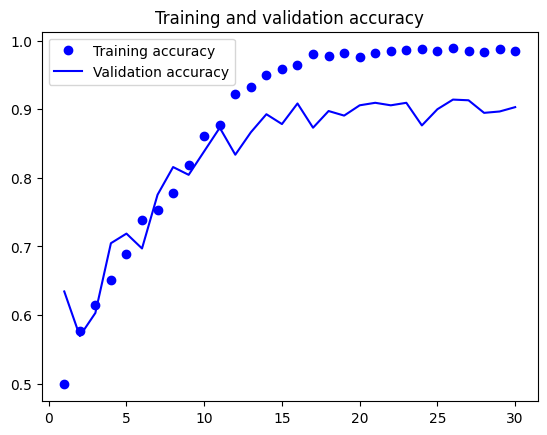

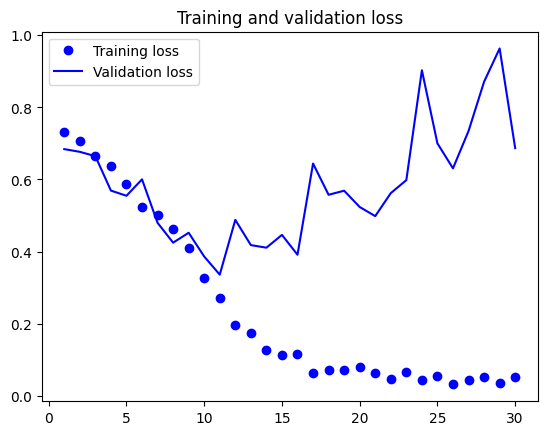

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Data Augmentation

In [41]:
# remove the warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [31]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

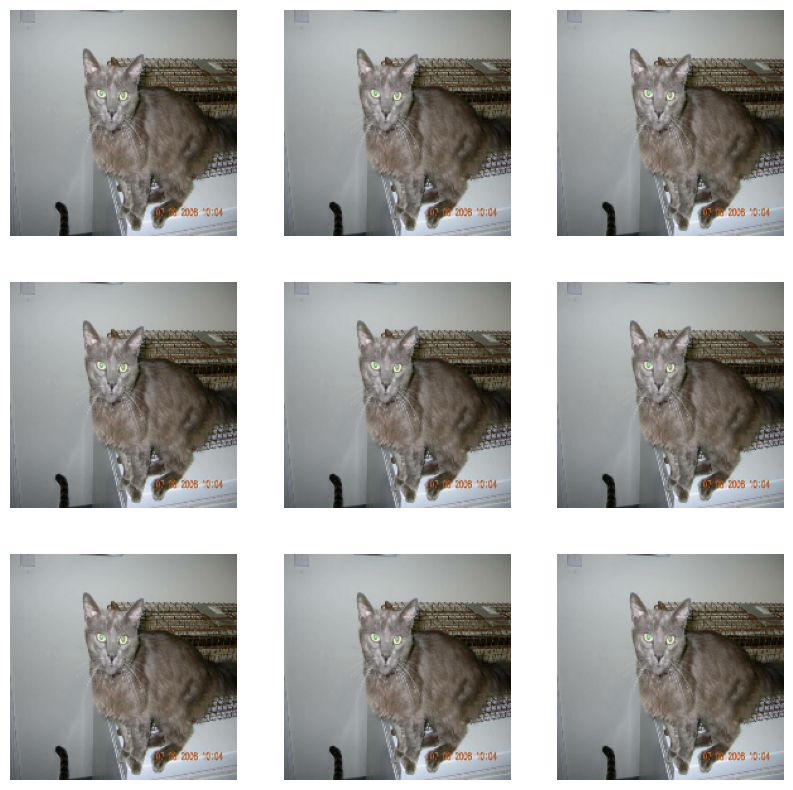

In [37]:
# to show how augmentation works
plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [24]:
inputs = keras.Input(shape=(180,180,3),name='cnn_model')
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs,outputs=outputs)

In [39]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [42]:
callback =[
    keras.callbacks.ModelCheckpoint(
        filepath= 'convnet_from_scratch_with_augmentation.tf',
        save_best_only=True,
        monitor='val_loss'
    )
]
history = model.fit(train_dataset,epochs=100,validation_data=validation_dataset,callbacks=callback)

Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 0.7458 - accuracy: 0.4963WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 35s 554ms/step - loss: 0.7458 - accuracy: 0.4963 - val_loss: 0.6916 - val_accuracy: 0.5047
Epoch 2/100
63/63 [==============================] - 24s 382ms/step - loss: 0.6998 - accuracy: 0.5347 - val_loss: 1.0904 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - ETA: 0s - loss: 0.6998 - accuracy: 0.5602WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 34s 543ms/step - loss: 0.6998 - accuracy: 0.5602 - val_loss: 0.6806 - val_accuracy: 0.6107
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 0.6851 - accuracy: 0.6392WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 36s 561ms/step - loss: 0.6851 - accuracy: 0.6392 - val_loss: 0.6512 - val_accuracy: 0.6240
Epoch 5/100
63/63 [==============================] - 25s 397ms/step - loss: 0.6348 - accuracy: 0.6522 - val_loss: 0.7611 - val_accuracy: 0.5293
Epoch 6/100
63/63 [==============================] - ETA: 0s - loss: 0.6334 - accuracy: 0.6487WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 35s 553ms/step - loss: 0.6334 - accuracy: 0.6487 - val_loss: 0.6111 - val_accuracy: 0.6583
Epoch 7/100
63/63 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.6672WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 35s 547ms/step - loss: 0.6396 - accuracy: 0.6672 - val_loss: 0.5537 - val_accuracy: 0.7117
Epoch 8/100
63/63 [==============================] - ETA: 0s - loss: 0.5997 - accuracy: 0.6812WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 34s 540ms/step - loss: 0.5997 - accuracy: 0.6812 - val_loss: 0.5355 - val_accuracy: 0.7307
Epoch 9/100
63/63 [==============================] - 24s 379ms/step - loss: 0.5809 - accuracy: 0.7026 - val_loss: 0.6605 - val_accuracy: 0.6487
Epoch 10/100
63/63 [==============================] - 27s 426ms/step - loss: 0.5729 - accuracy: 0.7021 - val_loss: 0.5502 - val_accuracy: 0.7217
Epoch 11/100
63/63 [==============================] - 26s 415ms/step - loss: 0.5711 - accuracy: 0.7076 - val_loss: 0.5792 - val_accuracy: 0.7127
Epoch 12/100
63/63 [==============================] - ETA: 0s - loss: 0.5662 - accuracy: 0.7141WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 35s 556ms/step - loss: 0.5662 - accuracy: 0.7141 - val_loss: 0.5147 - val_accuracy: 0.7537
Epoch 13/100
63/63 [==============================] - 25s 383ms/step - loss: 0.5376 - accuracy: 0.7301 - val_loss: 0.5933 - val_accuracy: 0.7080
Epoch 14/100
63/63 [==============================] - 25s 389ms/step - loss: 0.5179 - accuracy: 0.7561 - val_loss: 0.6580 - val_accuracy: 0.6570
Epoch 15/100
63/63 [==============================] - 25s 391ms/step - loss: 0.5166 - accuracy: 0.7486 - val_loss: 0.5750 - val_accuracy: 0.7050
Epoch 16/100
63/63 [==============================] - ETA: 0s - loss: 0.4960 - accuracy: 0.7616WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 34s 545ms/step - loss: 0.4960 - accuracy: 0.7616 - val_loss: 0.4807 - val_accuracy: 0.7923
Epoch 17/100
63/63 [==============================] - ETA: 0s - loss: 0.4884 - accuracy: 0.7671WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 36s 563ms/step - loss: 0.4884 - accuracy: 0.7671 - val_loss: 0.4468 - val_accuracy: 0.7863
Epoch 18/100
63/63 [==============================] - ETA: 0s - loss: 0.4768 - accuracy: 0.7721WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 35s 558ms/step - loss: 0.4768 - accuracy: 0.7721 - val_loss: 0.4146 - val_accuracy: 0.8113
Epoch 19/100
63/63 [==============================] - 25s 391ms/step - loss: 0.4593 - accuracy: 0.7911 - val_loss: 0.4313 - val_accuracy: 0.7973
Epoch 20/100
63/63 [==============================] - 25s 392ms/step - loss: 0.4539 - accuracy: 0.7816 - val_loss: 0.6170 - val_accuracy: 0.7540
Epoch 21/100
63/63 [==============================] - 24s 383ms/step - loss: 0.4351 - accuracy: 0.7976 - val_loss: 0.4624 - val_accuracy: 0.7937
Epoch 22/100
63/63 [==============================] - 24s 388ms/step - loss: 0.4166 - accuracy: 0.8031 - val_loss: 0.6939 - val_accuracy: 0.7423
Epoch 23/100
63/63 [==============================] - 24s 387ms/step - loss: 0.4084 - accuracy: 0.8066 - val_loss: 0.5436 - val_accuracy: 0.7847
Epoch 24/100
63/63 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.8186WARNING:tensorflow:Using a while_loop for conver

INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 34s 547ms/step - loss: 0.4209 - accuracy: 0.8186 - val_loss: 0.3839 - val_accuracy: 0.8307
Epoch 25/100
63/63 [==============================] - 25s 384ms/step - loss: 0.3900 - accuracy: 0.8241 - val_loss: 0.4091 - val_accuracy: 0.8207
Epoch 26/100
63/63 [==============================] - 24s 388ms/step - loss: 0.3765 - accuracy: 0.8296 - val_loss: 0.7036 - val_accuracy: 0.7640
Epoch 27/100
63/63 [==============================] - 24s 386ms/step - loss: 0.3893 - accuracy: 0.8211 - val_loss: 0.4051 - val_accuracy: 0.8260
Epoch 28/100
63/63 [==============================] - ETA: 0s - loss: 0.3504 - accuracy: 0.8476WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 32s 510ms/step - loss: 0.3504 - accuracy: 0.8476 - val_loss: 0.3588 - val_accuracy: 0.8517
Epoch 29/100
63/63 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.8516WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 32s 496ms/step - loss: 0.3448 - accuracy: 0.8516 - val_loss: 0.3515 - val_accuracy: 0.8643
Epoch 30/100
63/63 [==============================] - 24s 369ms/step - loss: 0.3671 - accuracy: 0.8376 - val_loss: 0.3657 - val_accuracy: 0.8453
Epoch 31/100
63/63 [==============================] - 23s 366ms/step - loss: 0.3416 - accuracy: 0.8541 - val_loss: 0.3971 - val_accuracy: 0.8323
Epoch 32/100
63/63 [==============================] - 23s 360ms/step - loss: 0.3417 - accuracy: 0.8531 - val_loss: 0.4559 - val_accuracy: 0.8263
Epoch 33/100
63/63 [==============================] - 23s 366ms/step - loss: 0.3283 - accuracy: 0.8636 - val_loss: 0.4804 - val_accuracy: 0.8183
Epoch 34/100
63/63 [==============================] - 22s 356ms/step - loss: 0.2968 - accuracy: 0.8756 - val_loss: 0.3766 - val_accuracy: 0.8583
Epoch 35/100
63/63 [==============================] - ETA: 0s - loss: 0.2909 - accuracy: 0.8801WARNING:tensorflow:Using a while_loop for conver

INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 33s 518ms/step - loss: 0.2909 - accuracy: 0.8801 - val_loss: 0.2839 - val_accuracy: 0.9010
Epoch 36/100
63/63 [==============================] - 24s 372ms/step - loss: 0.2964 - accuracy: 0.8761 - val_loss: 0.3969 - val_accuracy: 0.8640
Epoch 37/100
63/63 [==============================] - 24s 376ms/step - loss: 0.2848 - accuracy: 0.8801 - val_loss: 0.7085 - val_accuracy: 0.7677
Epoch 38/100
63/63 [==============================] - 23s 363ms/step - loss: 0.2956 - accuracy: 0.8806 - val_loss: 0.5163 - val_accuracy: 0.8217
Epoch 39/100
63/63 [==============================] - 23s 361ms/step - loss: 0.2645 - accuracy: 0.8926 - val_loss: 0.3391 - val_accuracy: 0.8737
Epoch 40/100
63/63 [==============================] - 24s 377ms/step - loss: 0.2703 - accuracy: 0.8951 - val_loss: 0.7890 - val_accuracy: 0.7727
Epoch 41/100
63/63 [==============================] - 24s 376ms/step - loss: 0.2449 - accuracy: 0.9025 - val_loss: 0.3263 - val_accuracy: 0.897

INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 31s 498ms/step - loss: 0.2549 - accuracy: 0.8946 - val_loss: 0.2770 - val_accuracy: 0.9090
Epoch 45/100
63/63 [==============================] - 23s 362ms/step - loss: 0.2641 - accuracy: 0.9015 - val_loss: 0.3264 - val_accuracy: 0.8877
Epoch 46/100
63/63 [==============================] - 22s 355ms/step - loss: 0.2222 - accuracy: 0.9150 - val_loss: 0.5236 - val_accuracy: 0.8627
Epoch 47/100
63/63 [==============================] - 23s 363ms/step - loss: 0.2336 - accuracy: 0.9065 - val_loss: 0.3054 - val_accuracy: 0.8937
Epoch 48/100
63/63 [==============================] - 24s 386ms/step - loss: 0.2147 - accuracy: 0.9080 - val_loss: 0.3094 - val_accuracy: 0.9010
Epoch 49/100
63/63 [==============================] - 23s 368ms/step - loss: 0.2143 - accuracy: 0.9110 - val_loss: 0.3157 - val_accuracy: 0.8910
Epoch 50/100
63/63 [==============================] - 23s 358ms/step - loss: 0.2117 - accuracy: 0.9135 - val_loss: 0.3417 - val_accuracy: 0.888

INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 35s 558ms/step - loss: 0.1944 - accuracy: 0.9315 - val_loss: 0.2531 - val_accuracy: 0.9243
Epoch 59/100
63/63 [==============================] - 24s 381ms/step - loss: 0.1849 - accuracy: 0.9345 - val_loss: 0.3358 - val_accuracy: 0.8893
Epoch 60/100
63/63 [==============================] - 23s 363ms/step - loss: 0.1776 - accuracy: 0.9275 - val_loss: 0.4055 - val_accuracy: 0.9050
Epoch 61/100
63/63 [==============================] - 24s 378ms/step - loss: 0.1920 - accuracy: 0.9325 - val_loss: 0.2740 - val_accuracy: 0.9170
Epoch 62/100
63/63 [==============================] - 23s 363ms/step - loss: 0.1802 - accuracy: 0.9375 - val_loss: 0.3152 - val_accuracy: 0.9040
Epoch 63/100
63/63 [==============================] - 23s 363ms/step - loss: 0.1704 - accuracy: 0.9390 - val_loss: 0.4649 - val_accuracy: 0.8870
Epoch 64/100
63/63 [==============================] - 22s 355ms/step - loss: 0.1602 - accuracy: 0.9440 - val_loss: 0.3254 - val_accuracy: 0.916

In [82]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf

In [103]:
def predict_cat_or_dog(image_path):
    img = image.load_img(image_path,target_size=(180,180))
    img_array= image.img_to_array(img)
    img_tensor = tf.convert_to_tensor(img_array)
    final_image = tf.expand_dims(img_tensor,axis=0)

    trained_model = keras.models.load_model('convnet_from_scratch_with_augmentation.tf')
    predictions = trained_model.predict(final_image)

    print(f"Prediction : {predictions}")
    
    predicted_class = (predictions >= 0.5).astype("int32")
    print(f"Predicted Class : {predicted_class}")
    if predictions >= 0.5:
        print ("Dog")
    else :
        print('Cat')
    

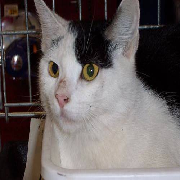

In [80]:
image.load_img(image_path,target_size=((180,180)))

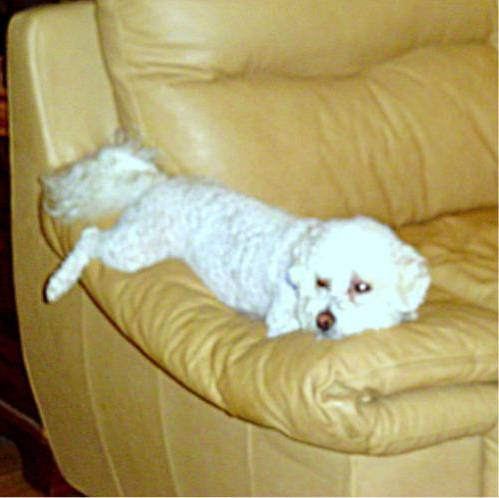

In [101]:
image_path = (rb"C:\Users\akash\OneDrive\Documents\DeepLearning\cats_vs_dogs_small\test\dog\dog.1520.jpg")
image.load_img(image_path)

In [104]:
predict_cat_or_dog(image_path)

1/1 [==============================] - 0s 134ms/step
Prediction : [[0.08795249]]
Predicted Class : [[0]]
Cat


In [119]:
def predict_carORdog_from_img(image_path):
    show = image.load_img(image_path)
    plt.imshow(show)
    pred = predict_cat_or_dog(image_path)
     
    return pred

1/1 [==============================] - 0s 131ms/step
Prediction : [[0.9656263]]
Predicted Class : [[1]]
Dog


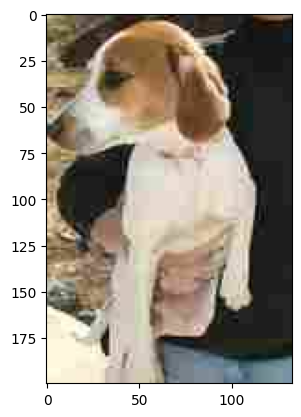

In [120]:
predict_carORdog_from_img(rb"C:\Users\akash\OneDrive\Documents\DeepLearning\cats_vs_dogs_small\test\dog\dog.1566.jpg")

1/1 [==============================] - 0s 133ms/step
Prediction : [[0.99207276]]
Predicted Class : [[1]]
Dog


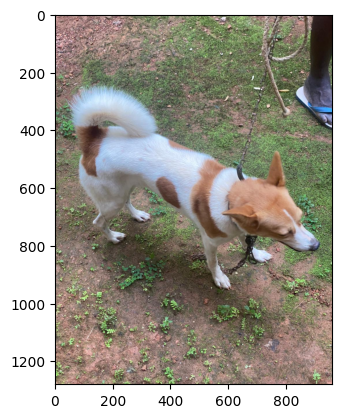

In [122]:
predict_carORdog_from_img(rb"C:\Users\akash\OneDrive\Desktop\WhatsApp Image 2024-11-09 at 16.44.43_5fc14cd4.jpg")

## Leveraging a Pretraining Model

ImageNet- 14 million labeled images and 1000 different classes

- animal classes - different specie of cats and dogs
- dogs vs cats`

### Feature Extraction and Fine Tuning

#### Feature Extraction with a pretrained model

- Prtrained Model unsing : VGG16- imageNet

In [1]:
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
import pathlib

In [3]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

In [4]:
from tensorflow import keras
from keras import layers

In [5]:
train_dataset = image_dataset_from_directory(new_base_dir / 'train',image_size=(180,180),batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / 'validation',image_size=(180,180),batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / 'test',image_size=(180,180),batch_size=32)

Found 2001 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


#### Introduing VGG16

In [6]:
con_base = keras.applications.vgg16.VGG16(
    weights= 'imagenet',include_top=False,input_shape=(180,180,3)
)

# include_top = False -- means not including the dense layer only conside convolutional base 

In [7]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Case-1
- Load convolutional base
- Extract features
- Save Features as numpy array
- Train a Dense classifier

- Data Augmentation (Cheaper) - not possible here

#### Case-2
- Load convolutional base
- Apply data augmentation
- Extend the model(adding dense layers)
- Run everything end to end

## Fast Feature Extraction without data augmentation

In [10]:
import numpy as np

In [11]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images,labels in dataset:
        prepocess_image = keras.applications.vgg16.preprocess_input(images)
        # print(prepocess_image)
        features = con_base.predict(prepocess_image)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features),np.concatenate(all_labels)

In [12]:
train_features,train_labels = get_features_and_labels(train_dataset)
val_features,val_labels = get_features_and_labels(validation_dataset)
test_features,test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 3s 3s/step


In [24]:
train_features.shape

(2001, 5, 5, 512)

In [25]:
inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs=  layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [26]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 256)               3277056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


In [28]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction.tf",
save_best_only=True,
monitor="val_loss")
]

In [29]:
history = model.fit(train_features,train_labels,epochs=20,validation_data=(val_features,val_labels),callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 42ms/step - loss: 17.3794 - accuracy: 0.9260 - val_loss: 16.5264 - val_accuracy: 0.9073
Epoch 2/20
63/63 [==============================] - 2s 28ms/step - loss: 4.1987 - accuracy: 0.9745 - val_loss: 1.9993 - val_accuracy: 0.9840
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.7022 - accuracy: 0.9880 - val_loss: 2.9398 - val_accuracy: 0.9807
Epoch 4/20
63/63 [==============================] - 2s 29ms/step - loss: 2.1921 - accuracy: 0.9840 - val_loss: 1.5947 - val_accuracy: 0.9897
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 0.6319 - accuracy: 0.9930 - val_loss: 2.8411 - val_accuracy: 0.9860
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9219 - accuracy: 0.9905 - val_loss: 3.5433 - val_accuracy: 0.9857
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 1.3036 - accuracy: 0.9935 - val_loss: 2.8789 - val_accuracy: 0.9843
Epoch 8/20


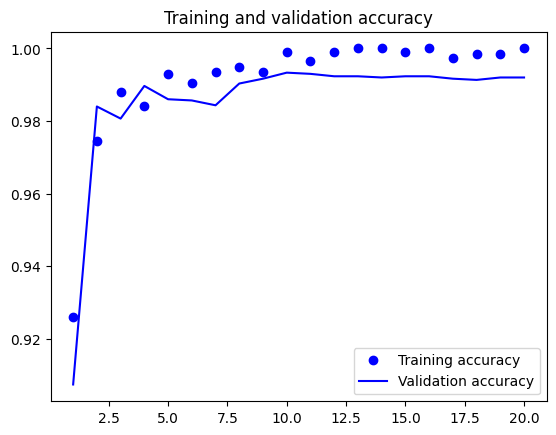

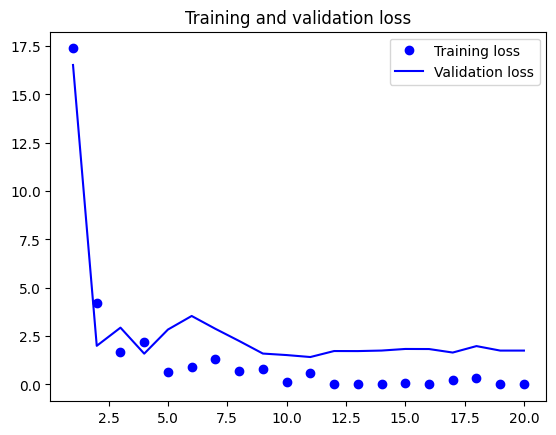

In [30]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Feature Extraction togather with data augmentation


In [48]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
)

In [49]:
con_base.trainable = False

In [50]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [51]:
conv_base.trainable = True
print('This is the number of trainable weights before freezing the conv base: ',len(conv_base.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base: ',len(conv_base.trainable_weights))


This is the number of trainable weights before freezing the conv base:  26
This is the number of trainable weights after freezing the conv base:  0


1- A data augmentation statge 2 - Our frozen convolutional base 3- A dense classifier

In [52]:
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)

In [53]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [54]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_3   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_3 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0   

In [55]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction_with_data_augmentation.tf",
save_best_only=True,
monitor="val_loss")
]

In [56]:
import tensorflow as tf

In [57]:
with tf.device('/GPU:1'):
    history = model.fit(train_dataset,epochs=50,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 20.4878 - accuracy: 0.8906WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 53s 755ms/step - loss: 20.4878 - accuracy: 0.8906 - val_loss: 2.9869 - val_accuracy: 0.9770
Epoch 2/50
63/63 [==============================] - ETA: 0s - loss: 5.6192 - accuracy: 0.9495WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 42s 665ms/step - loss: 5.6192 - accuracy: 0.9495 - val_loss: 2.6914 - val_accuracy: 0.9783
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 6.1555 - accuracy: 0.9545WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 46s 727ms/step - loss: 6.1555 - accuracy: 0.9545 - val_loss: 2.1236 - val_accuracy: 0.9820
Epoch 4/50
63/63 [==============================] - 35s 545ms/step - loss: 4.2911 - accuracy: 0.9685 - val_loss: 2.2074 - val_accuracy: 0.9867
Epoch 5/50
63/63 [==============================] - 35s 553ms/step - loss: 3.1661 - accuracy: 0.9720 - val_loss: 3.2061 - val_accuracy: 0.9823
Epoch 6/50
63/63 [==============================] - ETA: 0s - loss: 3.6591 - accuracy: 0.9755WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 47s 750ms/step - loss: 3.6591 - accuracy: 0.9755 - val_loss: 1.7373 - val_accuracy: 0.9880
Epoch 7/50
63/63 [==============================] - 35s 548ms/step - loss: 3.4359 - accuracy: 0.9760 - val_loss: 2.1689 - val_accuracy: 0.9880
Epoch 8/50
63/63 [==============================] - ETA: 0s - loss: 3.0977 - accuracy: 0.9725WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 47s 755ms/step - loss: 3.0977 - accuracy: 0.9725 - val_loss: 1.3095 - val_accuracy: 0.9900
Epoch 9/50
63/63 [==============================] - ETA: 0s - loss: 2.2066 - accuracy: 0.9795WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 47s 752ms/step - loss: 2.2066 - accuracy: 0.9795 - val_loss: 1.0803 - val_accuracy: 0.9907
Epoch 10/50
63/63 [==============================] - ETA: 0s - loss: 1.6159 - accuracy: 0.9855WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 47s 743ms/step - loss: 1.6159 - accuracy: 0.9855 - val_loss: 0.9693 - val_accuracy: 0.9923
Epoch 11/50
63/63 [==============================] - 36s 558ms/step - loss: 1.9375 - accuracy: 0.9815 - val_loss: 1.0421 - val_accuracy: 0.9923
Epoch 12/50
63/63 [==============================] - 35s 558ms/step - loss: 1.3481 - accuracy: 0.9820 - val_loss: 1.4058 - val_accuracy: 0.9900
Epoch 13/50
63/63 [==============================] - 35s 560ms/step - loss: 1.5624 - accuracy: 0.9840 - val_loss: 2.9020 - val_accuracy: 0.9820
Epoch 14/50
63/63 [==============================] - 35s 560ms/step - loss: 1.3247 - accuracy: 0.9850 - val_loss: 1.2827 - val_accuracy: 0.9917
Epoch 15/50
63/63 [==============================] - 35s 561ms/step - loss: 2.1611 - accuracy: 0.9780 - val_loss: 1.2793 - val_accuracy: 0.9907
Epoch 16/50
63/63 [==============================] - 35s 560ms/step - loss: 1.8783 - accuracy: 0.9820 - val_loss: 1.2830 - val_accuracy: 0.9920
Epoc

INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 48s 767ms/step - loss: 0.2483 - accuracy: 0.9960 - val_loss: 0.9264 - val_accuracy: 0.9923
Epoch 33/50
63/63 [==============================] - 36s 563ms/step - loss: 0.6231 - accuracy: 0.9920 - val_loss: 1.0510 - val_accuracy: 0.9913
Epoch 34/50
63/63 [==============================] - 35s 562ms/step - loss: 0.4418 - accuracy: 0.9935 - val_loss: 1.0832 - val_accuracy: 0.9923
Epoch 35/50
63/63 [==============================] - 35s 561ms/step - loss: 0.5944 - accuracy: 0.9905 - val_loss: 1.1780 - val_accuracy: 0.9920
Epoch 36/50
63/63 [==============================] - 35s 563ms/step - loss: 0.5090 - accuracy: 0.9925 - val_loss: 0.9289 - val_accuracy: 0.9917
Epoch 37/50
63/63 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.9920WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 48s 758ms/step - loss: 0.4903 - accuracy: 0.9920 - val_loss: 0.8868 - val_accuracy: 0.9933
Epoch 38/50
63/63 [==============================] - 36s 564ms/step - loss: 0.5167 - accuracy: 0.9920 - val_loss: 1.0803 - val_accuracy: 0.9913
Epoch 39/50
63/63 [==============================] - 36s 567ms/step - loss: 0.7665 - accuracy: 0.9920 - val_loss: 1.1506 - val_accuracy: 0.9927
Epoch 40/50
63/63 [==============================] - 36s 566ms/step - loss: 0.4588 - accuracy: 0.9935 - val_loss: 1.0223 - val_accuracy: 0.9923
Epoch 41/50
63/63 [==============================] - 35s 562ms/step - loss: 0.2888 - accuracy: 0.9965 - val_loss: 1.5573 - val_accuracy: 0.9883
Epoch 42/50
63/63 [==============================] - 36s 567ms/step - loss: 0.5936 - accuracy: 0.9945 - val_loss: 0.9863 - val_accuracy: 0.9917
Epoch 43/50
63/63 [==============================] - ETA: 0s - loss: 0.6226 - accuracy: 0.9905WARNING:tensorflow:Using a while_loop for converting R

INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


INFO:tensorflow:Assets written to: feature_extraction_with_data_augmentation.tf\assets


63/63 [==============================] - 48s 766ms/step - loss: 0.6226 - accuracy: 0.9905 - val_loss: 0.7708 - val_accuracy: 0.9940
Epoch 44/50
63/63 [==============================] - 36s 566ms/step - loss: 0.3244 - accuracy: 0.9920 - val_loss: 1.1298 - val_accuracy: 0.9920
Epoch 45/50
63/63 [==============================] - 36s 570ms/step - loss: 0.5732 - accuracy: 0.9905 - val_loss: 1.1303 - val_accuracy: 0.9920
Epoch 46/50
63/63 [==============================] - 35s 564ms/step - loss: 0.4832 - accuracy: 0.9930 - val_loss: 1.0046 - val_accuracy: 0.9910
Epoch 47/50
63/63 [==============================] - 36s 567ms/step - loss: 0.1724 - accuracy: 0.9975 - val_loss: 1.3850 - val_accuracy: 0.9913
Epoch 48/50
63/63 [==============================] - 35s 564ms/step - loss: 0.4998 - accuracy: 0.9935 - val_loss: 1.0869 - val_accuracy: 0.9917
Epoch 49/50
63/63 [==============================] - 35s 559ms/step - loss: 0.4908 - accuracy: 0.9940 - val_loss: 1.3051 - val_accuracy: 0.9923
Epoc

In [22]:
!nvidia-smi

Tue Nov 12 16:38:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.14                 Driver Version: 531.14       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 L...  WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8               N/A /  N/A|   2758MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--